In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import defaultdict

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

def check_if_rows_match(np_array, target_value): # make sure results are accurate
    for array_index, array in enumerate(np_array):
        sum_value = 0
        for element in array:
            sum_value += element
        if sum_value != target_value:
            print("Target Value Not Met! Sum value is", sum_value, "at array index", array_index)

# Define label types and possible values
label_types = {
    "min_max_label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "percentile_label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "threshold_label": ["Negative", "Positive"]
}

# Helper function to count label occurrences
def count_labels(df, label_col, possible_values):
    counts = df[label_col].value_counts()
    return [counts.get(label, 0) for label in possible_values]

# Compute mean and std
def compute_stats(counts_dict, label_types):
    results = {}
    for label_type, label_values in label_types.items():
        counts_array = np.array(counts_dict[label_type])  # shape: (5, num_labels)
        mean = np.mean(counts_array, axis=0)
        std = np.std(counts_array, axis=0, ddof=1)  # sample std
        results[label_type] = pd.DataFrame({
            "Label": label_values,
            "Mean": mean,
            "Std": std
        })
    return results

In [2]:
# Initialize containers
cnn3d_positive_counts = defaultdict(list)
gnn_positive_counts = defaultdict(list)
gat_positive_counts = defaultdict(list)
gcn_positive_counts = defaultdict(list)

cnn3d_unlabeled_counts = defaultdict(list)
gnn_unlabeled_counts = defaultdict(list)
gat_unlabeled_counts = defaultdict(list)
gcn_unlabeled_counts = defaultdict(list)

cnn3d_external_counts = defaultdict(list)
gnn_external_counts = defaultdict(list)
gat_external_counts = defaultdict(list)
gcn_external_counts = defaultdict(list)

cnn3d_piezo_counts = defaultdict(list)
gnn_piezo_counts = defaultdict(list)
gat_piezo_counts = defaultdict(list)
gcn_piezo_counts = defaultdict(list)

# Loop over each experiment
for i in range(1, 6):
    # internal positives
    cnn3d_df = pd.read_csv(f"../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestPositiveCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"../../../Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestPositiveCaptureRates.csv")
    gat_df = pd.read_csv(f"../../../Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestPositiveCaptureRates.csv")
    gcn_df = pd.read_csv(f"../../../Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestPositiveCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_positive_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_positive_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_positive_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_positive_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    # unlabeled
    cnn3d_df = pd.read_csv(f"../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestUnlabeledCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"../../../Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestUnlabeledCaptureRates.csv")
    gat_df = pd.read_csv(f"../../../Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestUnlabeledCaptureRates.csv")
    gcn_df = pd.read_csv(f"../../../Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestUnlabeledCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_unlabeled_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_unlabeled_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_unlabeled_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_unlabeled_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    # external positives
    cnn3d_df = pd.read_csv(f"../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestIvanCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"../../../Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestIvanCaptureRates.csv")
    gat_df = pd.read_csv(f"../../../Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestIvanCaptureRates.csv")
    gcn_df = pd.read_csv(f"../../../Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestIvanCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_external_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_external_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_external_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_external_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    cnn3d_df = pd.read_csv(f"../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestPiezo1_16CaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"../../../Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestPiezo1_16CaptureRates.csv")
    gat_df = pd.read_csv(f"../../../Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestPiezo1_16CaptureRates.csv")
    gcn_df = pd.read_csv(f"../../../Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestPiezo1_16CaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_piezo_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_piezo_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_piezo_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_piezo_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

cnn3d_positive_stats = compute_stats(cnn3d_positive_counts, label_types)
gnn_positive_stats = compute_stats(gnn_positive_counts, label_types)
gat_positive_stats = compute_stats(gat_positive_counts, label_types)
gcn_positive_stats = compute_stats(gcn_positive_counts, label_types)

cnn3d_unlabeled_stats = compute_stats(cnn3d_unlabeled_counts, label_types)
gnn_unlabeled_stats = compute_stats(gnn_unlabeled_counts, label_types)
gat_unlabeled_stats = compute_stats(gat_unlabeled_counts, label_types)
gcn_unlabeled_stats = compute_stats(gcn_unlabeled_counts, label_types)

cnn3d_external_stats = compute_stats(cnn3d_external_counts, label_types)
gnn_external_stats = compute_stats(gnn_external_counts, label_types)
gat_external_stats = compute_stats(gat_external_counts, label_types)
gcn_external_stats = compute_stats(gcn_external_counts, label_types)

cnn3d_piezo_stats = compute_stats(cnn3d_piezo_counts, label_types)
gnn_piezo_stats = compute_stats(gnn_piezo_counts, label_types)
gat_piezo_stats = compute_stats(gat_piezo_counts, label_types)
gcn_piezo_stats = compute_stats(gcn_piezo_counts, label_types)

[[ 5.8  5.4  5.2 40.6]
 [17.8 12.8  8.4 18. ]
 [15.2 10.6 13.4 17.8]
 [ 8.4  7.4 14.8 26.4]]
[[1.30384048 1.67332005 0.83666003 1.81659021]
 [2.58843582 4.20713679 2.07364414 3.16227766]
 [1.4832397  2.07364414 2.30217289 2.58843582]
 [1.14017543 2.30217289 5.01996016 5.72712843]]


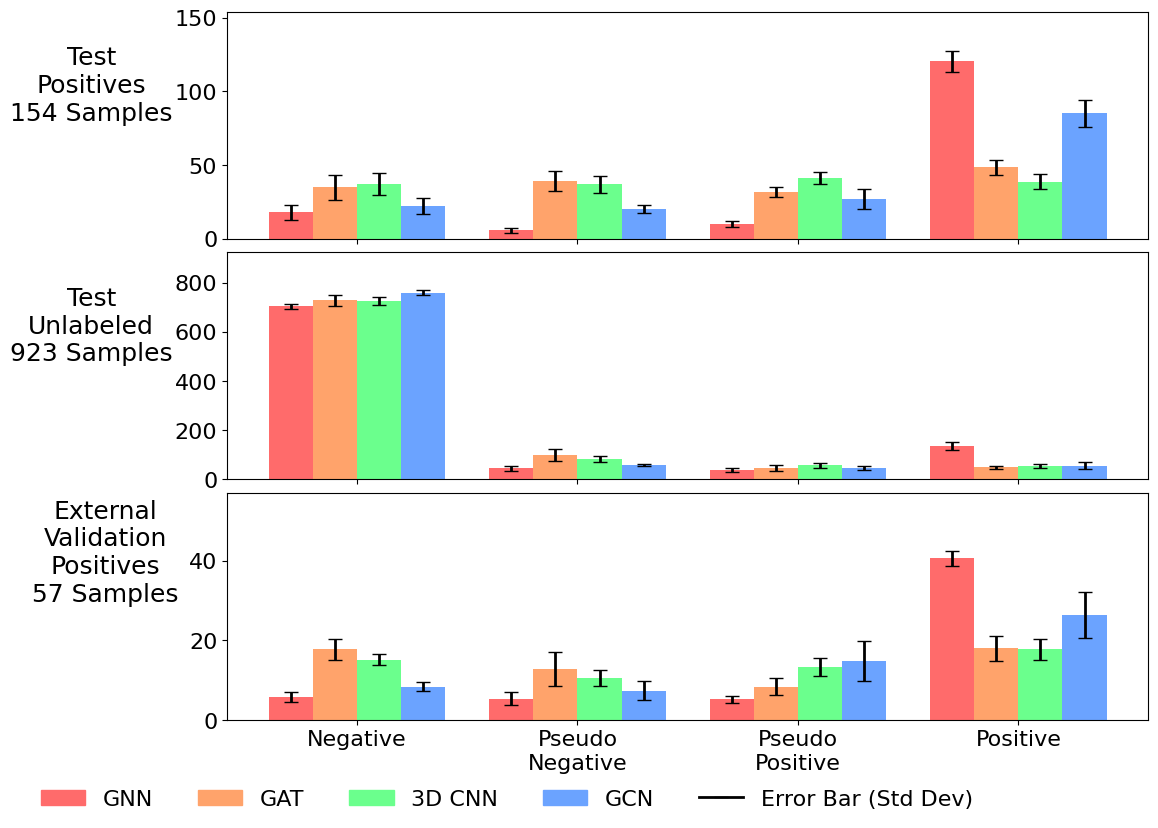

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15), sharex='col')
width = 0.2
error_kwargs = {'ecolor': 'black', 'elinewidth': 2, 'capsize': 5}

xtick_labels_full = ["Negative", "Pseudo\nNegative", "Pseudo\nPositive", "Positive"]
xtick_labels_short = ["Negative", "Positive"]

colors = ["#FF6B6B", "#FFA36B", "#6BFF8D", "#6BA3FF"]

plt.rcParams.update({
    "axes.labelsize": 18,   # y-axis labels
    "xtick.labelsize": 16,  # x-axis tick labels
    "ytick.labelsize": 16,  # y-axis tick labels
    "axes.titlesize": 20,   # per-panel titles if you add them
    "legend.fontsize": 16,  # legend text
    "figure.titlesize": 22  # suptitle if used
})

gnn_percentile_results = gnn_positive_stats["percentile_label"]["Mean"].values
gat_percentile_results = gat_positive_stats["percentile_label"]["Mean"].values
cnn_percentile_results = cnn3d_positive_stats["percentile_label"]["Mean"].values
gcn_percentile_results = gcn_positive_stats["percentile_label"]["Mean"].values

gnn_percentile_std_results = gnn_positive_stats["percentile_label"]["Std"].values
gat_percentile_std_results = gat_positive_stats["percentile_label"]["Std"].values
cnn_percentile_std_results = cnn3d_positive_stats["percentile_label"]["Std"].values
gcn_percentile_std_results = gcn_positive_stats["percentile_label"]["Std"].values

percentile_results = np.array([
    gnn_percentile_results,
    gat_percentile_results,
    cnn_percentile_results,
    gcn_percentile_results
])
percentile_std_results = np.array([
    gnn_percentile_std_results,
    gat_percentile_std_results,
    cnn_percentile_std_results,
    gcn_percentile_std_results
])

offsets = [-1.5, -0.5, 0.5, 1.5]

# Percentile Plot
x = np.arange(4)
for i, offset in enumerate(offsets):
    axs[0].bar(x + offset * width, percentile_results[i], width,
                  yerr=percentile_std_results[i], error_kw=error_kwargs, color=colors[i])
axs[0].set_ylim(0, 154)
axs[0].set_xticks([])
axs[0].set_ylabel("Test\nPositives\n154 Samples", fontsize=18, rotation=0, labelpad=60)

gnn_percentile_results = gnn_unlabeled_stats["percentile_label"]["Mean"].values
gat_percentile_results = gat_unlabeled_stats["percentile_label"]["Mean"].values
cnn_percentile_results = cnn3d_unlabeled_stats["percentile_label"]["Mean"].values
gcn_percentile_results = gcn_unlabeled_stats["percentile_label"]["Mean"].values

gnn_percentile_std_results = gnn_unlabeled_stats["percentile_label"]["Std"].values
gat_percentile_std_results = gat_unlabeled_stats["percentile_label"]["Std"].values
cnn_percentile_std_results = cnn3d_unlabeled_stats["percentile_label"]["Std"].values
gcn_percentile_std_results = gcn_unlabeled_stats["percentile_label"]["Std"].values

percentile_results = np.array([
    gnn_percentile_results,
    gat_percentile_results,
    cnn_percentile_results,
    gcn_percentile_results
])
percentile_std_results = np.array([
    gnn_percentile_std_results,
    gat_percentile_std_results,
    cnn_percentile_std_results,
    gcn_percentile_std_results
])

# Row 2 — Percentile
for i, offset in enumerate(offsets):
    axs[1].bar(x + offset * width, percentile_results[i], width,
                  yerr=percentile_std_results[i], error_kw=error_kwargs, color=colors[i])

axs[1].set_ylim(0, 923)
axs[1].set_xticks([])
axs[1].set_ylabel("Test\nUnlabeled\n923 Samples", fontsize=18, rotation=0, labelpad=60)


gnn_percentile_results = gnn_external_stats["percentile_label"]["Mean"].values
gat_percentile_results = gat_external_stats["percentile_label"]["Mean"].values
cnn_percentile_results = cnn3d_external_stats["percentile_label"]["Mean"].values
gcn_percentile_results = gcn_external_stats["percentile_label"]["Mean"].values

gnn_percentile_std_results = gnn_external_stats["percentile_label"]["Std"].values
gat_percentile_std_results = gat_external_stats["percentile_label"]["Std"].values
cnn_percentile_std_results = cnn3d_external_stats["percentile_label"]["Std"].values
gcn_percentile_std_results = gcn_external_stats["percentile_label"]["Std"].values

percentile_results = np.array([
    gnn_percentile_results,
    gat_percentile_results,
    cnn_percentile_results,
    gcn_percentile_results
])
percentile_std_results = np.array([
    gnn_percentile_std_results,
    gat_percentile_std_results,
    cnn_percentile_std_results,
    gcn_percentile_std_results
])

print(percentile_results)
print(percentile_std_results)

# Row 2 — Percentile
for i, offset in enumerate(offsets):
    axs[2].bar(x + offset * width, percentile_results[i], width,
                  yerr=percentile_std_results[i], error_kw=error_kwargs, color=colors[i])
# --- Add extra LABind bar in External Positives (row index 2), Strong Positive column ---
labind_height = 6
strong_pos_idx = 3          # 0: Strong Neg, 1: Pseudo Neg, 2: Pseudo Pos, 3: Strong Pos
labind_offset = 2.5         # center the bar within the group; adjust if you want it staggered
# axs[2].bar(strong_pos_idx + labind_offset * width,
#            labind_height,
#            width,
#            color='#9467bd',
#            label='LABind')
# axs[2].bar(0 - labind_offset * width,
#            51,
#            width,
#            color='#9467bd',
#            label='LABind')

axs[2].set_ylim(0, 57)
axs[2].set_xticks(x)
axs[2].set_xticklabels(xtick_labels_full, fontsize=16)
axs[2].set_ylabel("External\nValidation\nPositives\n57 Samples", fontsize=18, rotation=0, labelpad=60)

gnn_percentile_results = gnn_piezo_stats["percentile_label"]["Mean"].values
gat_percentile_results = gat_piezo_stats["percentile_label"]["Mean"].values
cnn_percentile_results = cnn3d_piezo_stats["percentile_label"]["Mean"].values
gcn_percentile_results = gcn_piezo_stats["percentile_label"]["Mean"].values

gnn_percentile_std_results = gnn_piezo_stats["percentile_label"]["Std"].values
gat_percentile_std_results = gat_piezo_stats["percentile_label"]["Std"].values
cnn_percentile_std_results = cnn3d_piezo_stats["percentile_label"]["Std"].values
gcn_percentile_std_results = gcn_piezo_stats["percentile_label"]["Std"].values

percentile_results = np.array([
    gnn_percentile_results,
    gat_percentile_results,
    cnn_percentile_results,
    gcn_percentile_results
])
percentile_std_results = np.array([
    gnn_percentile_std_results,
    gat_percentile_std_results,
    cnn_percentile_std_results,
    gcn_percentile_std_results
])

# # Row 2 — Percentile
# for i, offset in enumerate(offsets):
#     axs[3].bar(x + offset * width, percentile_results[i], width,
#                   yerr=percentile_std_results[i], error_kw=error_kwargs)

# axs[3].set_ylim(0, 45)
# axs[3].set_xticks(x)
# axs[3].set_xticklabels(xtick_labels_full, fontsize=16)
# axs[3].set_ylabel("Piezo\n45 Samples", fontsize=18, rotation=0, labelpad=60)

plt.tight_layout()

# Adjust figure size for PowerPoint slide (widescreen 16:9)
fig.set_size_inches(13.33, 7.5)

# Add global column labels
#fig.text(0.5, 1.01, 'Percentile', ha='center', va='center', fontsize=22)

gnn_patch = mpatches.Patch(color='#FF6B6B', label='GNN')     # Blue
gat_patch = mpatches.Patch(color='#FFA36B', label='GAT')     # Orange
cnn_patch = mpatches.Patch(color='#6BFF8D', label='3D CNN')  # Green
gcn_patch = mpatches.Patch(color='#6BA3FF', label='GCN')
error_handle = plt.Line2D([0], [0], color='black', linewidth=2, marker='_', markersize=10, label='Error Bar (Std Dev)')

#labind_patch = mpatches.Patch(color='#9467bd', label='LABind')

fig.legend(handles=[gnn_patch, gat_patch, cnn_patch, gcn_patch, error_handle],
           loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=5, fontsize=16, frameon=False)

plt.show()

#save to pdf
